## Installing Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import lightgbm as lgb
import os
import cv2
import glob
import time
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## Dataset Description and Preprocessing

In [2]:
RESIZE_SHAPE = (128, 128)

In [3]:
def normalized_read(paths):
    all_images = []
    for path in paths:
        for i in range(len(path)):
            img = cv2.imread(path[i], 0)
            normalized_img = cv2.resize(img, RESIZE_SHAPE)
            all_images.append(normalized_img.flatten())
    return np.array(all_images)

def show_img(img):
    return plt.imshow(np.reshape(img, RESIZE_SHAPE), cmap='gray')

In [4]:
def create_heatmap(path, kernel_size=(1,1),colormap=cv2.COLORMAP_JET,a1=0.5,a2=0.5):
    im_map = cv2.imread(path)
    im_cloud_blur = cv2.GaussianBlur(im_map,kernel_size,0)
    im_cloud_clr = cv2.applyColorMap(im_cloud_blur, colormap)
    return (a1*im_map + a2*im_cloud_clr).astype(np.uint8)

In [5]:
def results(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [6]:
train_covid  = glob.glob("D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\train\COVID\\*")
test_covid  = glob.glob("D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\test\COVID\\*")
val_covid  = glob.glob("D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\val\COVID\\*")

train_non_covid  = glob.glob("D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\train\\Non-COVID\\*")
test_non_covid  = glob.glob("D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\test\\Non-COVID\\*")
val_non_covid  = glob.glob("D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\val\\Non-COVID\\*")

In [7]:
train_dataset_w = normalized_read([train_covid, train_non_covid])
val_dataset_w = normalized_read([val_covid, val_non_covid])
test_dataset_w = normalized_read([test_covid, test_non_covid])

## Visualizing XRay Images

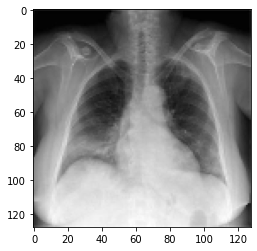

In [8]:
show_img(train_dataset_w[0])

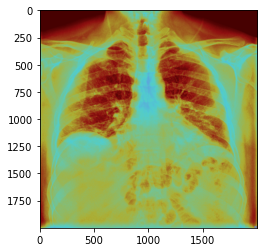

In [9]:
plt.imshow(create_heatmap('D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Final Dataset\COVID\\0a7faa2a.jpg'))

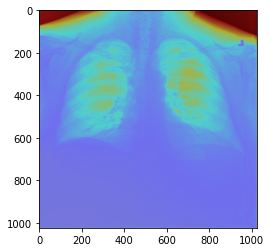

In [10]:
plt.imshow(create_heatmap('D:\YEAR 2\SEMESTER 2\PATTERN RECOGNITION & ML\ML PROJECT\Dataset Main\\test\\Non-COVID\\00001300_000.png'))

In [11]:
train_labels = np.append(np.ones(len(train_covid)), np.zeros(len(train_non_covid)))
val_labels = np.append(np.ones(len(val_covid)), np.zeros(len(val_non_covid)))
test_labels = np.append(np.ones(len(test_covid)), np.zeros(len(test_non_covid)))

In [12]:
train_dataset = pd.DataFrame(train_dataset_w)
train_dataset["label"] = train_labels
val_dataset = pd.DataFrame(val_dataset_w)
val_dataset["label"] = val_labels
test_dataset = pd.DataFrame(test_dataset_w)
test_dataset["label"] = test_labels

In [13]:
train_dataset = np.array(train_dataset)
val_dataset = np.array(val_dataset)
test_dataset = np.array(test_dataset)